# Content

#### 1 Importing libraries and datasets
#### 2 Cleaning and wrangling census data
#### 3 Exploring ward relationships
#### 4 Exporting final dataset

## 1 Importing libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#importing dataset
path=r'/Users/Amaikuru/Desktop/Toronto Bus Delays'

In [3]:
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared', 'explored_set.pkl'))

In [4]:
profiles=pd.read_csv(os.path.join(path, '02 Data', 'Original', 'census.csv'),encoding='latin1')

## 2 Cleaning and wrangling census data

In [14]:
profiles.columns

Index(['CENSUS_YEAR', 'DGUID', 'ALT_GEO_CODE', 'GEO_LEVEL', 'GEO_NAME',
       'TNR_SF', 'TNR_LF', 'DATA_QUALITY_FLAG', 'CHARACTERISTIC_ID',
       'CHARACTERISTIC_NAME', 'CHARACTERISTIC_NOTE', 'C1_COUNT_TOTAL',
       'SYMBOL', 'C2_COUNT_MEN+', 'SYMBOL.1', 'C3_COUNT_WOMEN+', 'SYMBOL.2',
       'C10_RATE_TOTAL', 'SYMBOL.3', 'C11_RATE_MEN+', 'SYMBOL.4',
       'C12_RATE_WOMEN+', 'SYMBOL.5'],
      dtype='object')

In [63]:
#reducing to needed columns
census=profiles[['CENSUS_YEAR','DGUID','GEO_LEVEL','GEO_NAME','CHARACTERISTIC_NAME','C1_COUNT_TOTAL']]

In [17]:
census['GEO_LEVEL'].value_counts()

Federal electoral district (2013 Representation Order)    501930
Province                                                   14850
Territory                                                   4455
Country                                                     1485
Name: GEO_LEVEL, dtype: int64

In [18]:
#wards are federal electoral districs
#filtering to only include federal electoral districts

In [20]:
feds=census.loc[census['GEO_LEVEL']=='Federal electoral district (2013 Representation Order)']

In [21]:
feds.head()

CENSUS_YEAR                                          GEO_LEVEL GEO_NAME  \
2970         2021  Federal electoral district (2013 Representatio...   Avalon   
2971         2021  Federal electoral district (2013 Representatio...   Avalon   
2972         2021  Federal electoral district (2013 Representatio...   Avalon   
2973         2021  Federal electoral district (2013 Representatio...   Avalon   
2974         2021  Federal electoral district (2013 Representatio...   Avalon   

                                CHARACTERISTIC_NAME  C1_COUNT_TOTAL  
2970                               Population, 2021         87191.0  
2971                               Population, 2016         86559.0  
2972     Population percentage change, 2016 to 2021             0.7  
2973                        Total private dwellings         45074.0  
2974  Private dwellings occupied by usual residents         36622.0

In [39]:
#pulling list of wards and turning to set
wards=set(df['ward_name'].tolist())

In [40]:
wards

{'Beaches-East York',
 'Davenport',
 'Don Valley East',
 'Don Valley North',
 'Don Valley West',
 'Eglinton-Lawrence',
 'Etobicoke Centre',
 'Etobicoke North',
 'Etobicoke-Lakeshore',
 'Humber River-Black Creek',
 'Parkdale-High Park',
 'Scarborough Centre',
 'Scarborough North',
 'Scarborough Southwest',
 'Scarborough-Agincourt',
 'Scarborough-Guildwood',
 'Scarborough-Rouge Park',
 'Spadina-Fort York',
 'Toronto Centre',
 'Toronto-Danforth',
 "Toronto-St. Paul's",
 'University-Rosedale',
 'Willowdale',
 'York Centre',
 'York South-Weston',
 'outside_wards'}

In [41]:
#returning to list
wards=list(wards)


In [42]:
wards

['Don Valley North',
 'York Centre',
 'Don Valley East',
 'Scarborough-Guildwood',
 'Etobicoke-Lakeshore',
 'Scarborough Southwest',
 'York South-Weston',
 'Humber River-Black Creek',
 "Toronto-St. Paul's",
 'Etobicoke Centre',
 'Toronto Centre',
 'Etobicoke North',
 'Don Valley West',
 'Scarborough North',
 'Willowdale',
 'Parkdale-High Park',
 'Davenport',
 'Scarborough-Agincourt',
 'Toronto-Danforth',
 'Scarborough Centre',
 'outside_wards',
 'Beaches-East York',
 'Eglinton-Lawrence',
 'Spadina-Fort York',
 'University-Rosedale',
 'Scarborough-Rouge Park']

In [43]:
#locating census rows in selected wards
ward1=feds.loc[feds['GEO_NAME'].isin(wards)]

In [44]:
ward1

CENSUS_YEAR                                          GEO_LEVEL  \
198990         2021  Federal electoral district (2013 Representatio...   
198991         2021  Federal electoral district (2013 Representatio...   
198992         2021  Federal electoral district (2013 Representatio...   
198993         2021  Federal electoral district (2013 Representatio...   
198994         2021  Federal electoral district (2013 Representatio...   
...             ...                                                ...   
348970         2021  Federal electoral district (2013 Representatio...   
348971         2021  Federal electoral district (2013 Representatio...   
348972         2021  Federal electoral district (2013 Representatio...   
348973         2021  Federal electoral district (2013 Representatio...   
348974         2021  Federal electoral district (2013 Representatio...   

           GEO_NAME                                CHARACTERISTIC_NAME  \
198990    Davenport                                   Population, 2021   
198991    Davenport                                   Population, 2016   
198992    Davenport         Population percentage change, 2016 to 2021   
198993    Davenport                            Total private dwellings   
198994    Davenport      Private dwellings occupied by usual residents   
...             ...                                                ...   
348970  York Centre    Average monthly shelter costs for rented dwe...   
348971  York Centre  Total - Households living in a dwelling provid...   
348972  York Centre    % of households living in a dwelling provide...   
348973  York Centre    Median monthly shelter costs for dwellings p...   
348974  York Centre    Average monthly shelter costs for dwellings ...   

        C1_COUNT_TOTAL  
198990        105946.0  
198991        108473.0  
198992            -2.3  
198993         50157.0  
198994         45757.0  
...                ...  
348970          1448.0  
348971             0.0  
348972             NaN  
348973             NaN  
348974             NaN  

[17820 rows x 5 columns]

In [45]:
ward1['GEO_NAME'].value_counts()

Davenport                1485
Don Valley East          1485
Don Valley North         1485
Don Valley West          1485
Etobicoke Centre         1485
Etobicoke North          1485
Scarborough Centre       1485
Scarborough North        1485
Scarborough Southwest    1485
Toronto Centre           1485
Willowdale               1485
York Centre              1485
Name: GEO_NAME, dtype: int64

In [46]:
wardfound=list(set(ward1['GEO_NAME'].to_list()))

In [48]:
wardfound

['Toronto Centre',
 'Don Valley West',
 'Etobicoke North',
 'Scarborough North',
 'Willowdale',
 'Davenport',
 'Scarborough Southwest',
 'Don Valley North',
 'York Centre',
 'Scarborough Centre',
 'Etobicoke Centre',
 'Don Valley East']

In [49]:
#locating wards not in current dataset
wardnotfound=[]
for ward in wards:
    if ward not in wardfound:
        wardnotfound.append(ward)

In [50]:
wardnotfound

['Scarborough-Guildwood',
 'Etobicoke-Lakeshore',
 'York South-Weston',
 'Humber River-Black Creek',
 "Toronto-St. Paul's",
 'Parkdale-High Park',
 'Scarborough-Agincourt',
 'Toronto-Danforth',
 'outside_wards',
 'Beaches-East York',
 'Eglinton-Lawrence',
 'Spadina-Fort York',
 'University-Rosedale',
 'Scarborough-Rouge Park']

In [52]:
#except outside wards all the wards with the character '-', are entered in the census dataset as '--'
#replacing all the -- characters
wards = [w.replace('-', '--') for w in wards]

In [105]:
wards

['Don Valley North',
 'York Centre',
 'Don Valley East',
 'Scarborough--Guildwood',
 'Etobicoke--Lakeshore',
 'Scarborough Southwest',
 'York South--Weston',
 'Humber River--Black Creek',
 "Toronto--St. Paul's",
 'Etobicoke Centre',
 'Toronto Centre',
 'Etobicoke North',
 'Don Valley West',
 'Scarborough North',
 'Willowdale',
 'Parkdale--High Park',
 'Davenport',
 'Scarborough--Agincourt',
 'Toronto--Danforth',
 'Scarborough Centre',
 'outside_wards',
 'Beaches--East York',
 'Eglinton--Lawrence',
 'Spadina--Fort York',
 'University--Rosedale',
 'Scarborough--Rouge Park']

In [115]:
#locating again
ward1=feds.loc[feds['GEO_NAME'].isin(wards)]

In [116]:
ward1.head()

CENSUS_YEAR                                               GEO_LEVEL  \
182655         2021  Federal electoral district (2013 Representation Order)   
182656         2021  Federal electoral district (2013 Representation Order)   
182657         2021  Federal electoral district (2013 Representation Order)   
182658         2021  Federal electoral district (2013 Representation Order)   
182659         2021  Federal electoral district (2013 Representation Order)   

                  GEO_NAME                            CHARACTERISTIC_NAME  \
182655  Beaches--East York                               Population, 2021   
182656  Beaches--East York                               Population, 2016   
182657  Beaches--East York     Population percentage change, 2016 to 2021   
182658  Beaches--East York                        Total private dwellings   
182659  Beaches--East York  Private dwellings occupied by usual residents   

        C1_COUNT_TOTAL  
182655        109359.0  
182656        109468.0  
182657            -0.1  
182658         48749.0  
182659         45722.0

In [108]:
ward1['GEO_NAME'].value_counts()

Beaches--East York           1485
Scarborough--Guildwood       1485
York South--Weston           1485
York Centre                  1485
Willowdale                   1485
University--Rosedale         1485
Toronto--Danforth            1485
Toronto Centre               1485
Spadina--Fort York           1485
Scarborough Southwest        1485
Scarborough--Rouge Park      1485
Scarborough North            1485
Scarborough Centre           1485
Davenport                    1485
Scarborough--Agincourt       1485
Toronto--St. Paul's          1485
Parkdale--High Park          1485
Etobicoke North              1485
Etobicoke--Lakeshore         1485
Etobicoke Centre             1485
Eglinton--Lawrence           1485
Don Valley West              1485
Don Valley North             1485
Don Valley East              1485
Humber River--Black Creek    1485
Name: GEO_NAME, dtype: int64

#### there are now 25 wards found which is the appropriate amount

In [109]:
df.columns

Index(['Date', 'Time', 'Day', 'Incident', 'Min Delay', 'Min Gap', 'Fleet',
       'stop_name', 'Route', 'ward_name', 'ward_population', 'ward_median_age',
       'ward_median_income', 'n_poi', 'n_schools', 'n_worship',
       'dist_to_nearest_station', 'n_stations', 'n_stops', 'n_stops_route',
       'avg_temperature', 'avg_visibility', 'precipitation',
       'stop_delay_count', 'route_delay_count', 'ward_delay_count',
       'day_delay_count'],
      dtype='object')

In [110]:
#looking for ward profiles
one_ward=ward1.loc[ward1['GEO_NAME']=='Davenport']

In [111]:
one_ward.shape

(1485, 5)

In [112]:
pd.set_option('display.max_colwidth', None)

In [89]:
one_ward

CENSUS_YEAR                                               GEO_LEVEL  \
198990         2021  Federal electoral district (2013 Representation Order)   
198991         2021  Federal electoral district (2013 Representation Order)   
198992         2021  Federal electoral district (2013 Representation Order)   
198993         2021  Federal electoral district (2013 Representation Order)   
198994         2021  Federal electoral district (2013 Representation Order)   
198995         2021  Federal electoral district (2013 Representation Order)   
198996         2021  Federal electoral district (2013 Representation Order)   
198997         2021  Federal electoral district (2013 Representation Order)   
198998         2021  Federal electoral district (2013 Representation Order)   
198999         2021  Federal electoral district (2013 Representation Order)   
199000         2021  Federal electoral district (2013 Representation Order)   
199001         2021  Federal electoral district (2013 Representation Order)   
199002         2021  Federal electoral district (2013 Representation Order)   
199003         2021  Federal electoral district (2013 Representation Order)   
199004         2021  Federal electoral district (2013 Representation Order)   
199005         2021  Federal electoral district (2013 Representation Order)   
199006         2021  Federal electoral district (2013 Representation Order)   
199007         2021  Federal electoral district (2013 Representation Order)   
199008         2021  Federal electoral district (2013 Representation Order)   
199009         2021  Federal electoral district (2013 Representation Order)   
199010         2021  Federal electoral district (2013 Representation Order)   
199011         2021  Federal electoral district (2013 Representation Order)   
199012         2021  Federal electoral district (2013 Representation Order)   
199013         2021  Federal electoral district (2013 Representation Order)   
199014         2021  Federal electoral district (2013 Representation Order)   
199015         2021  Federal electoral district (2013 Representation Order)   
199016         2021  Federal electoral district (2013 Representation Order)   
199017         2021  Federal electoral district (2013 Representation Order)   
199018         2021  Federal electoral district (2013 Representation Order)   
199019         2021  Federal electoral district (2013 Representation Order)   
199020         2021  Federal electoral district (2013 Representation Order)   
199021         2021  Federal electoral district (2013 Representation Order)   
199022         2021  Federal electoral district (2013 Representation Order)   
199023         2021  Federal electoral district (2013 Representation Order)   
199024         2021  Federal electoral district (2013 Representation Order)   
199025         2021  Federal electoral district (2013 Representation Order)   
199026         2021  Federal electoral district (2013 Representation Order)   
199027         2021  Federal electoral district (2013 Representation Order)   
199028         2021  Federal electoral district (2013 Representation Order)   
199029         2021  Federal electoral district (2013 Representation Order)   
199030         2021  Federal electoral district (2013 Representation Order)   
199031         2021  Federal electoral district (2013 Representation Order)   
199032         2021  Federal electoral district (2013 Representation Order)   
199033         2021  Federal electoral district (2013 Representation Order)   
199034         2021  Federal electoral district (2013 Representation Order)   
199035         2021  Federal electoral district (2013 Representation Order)   
199036         2021  Federal electoral district (2013 Representation Order)   
199037         2021  Federal electoral district (2013 Representation Order)   
199038         2021  Federal electoral district (2013 Representation Order)   
199039         2021  Federal electoral district (2013 Repr

#### row values needed are: population 2021, population density per square kilometer, age group data, median age,median total income 2020,prevalence of low income

In [120]:
#making sure all characteristics are strings
ward1['CHARACTERISTIC_NAME']=ward1['CHARACTERISTIC_NAME'].astype(str)

/var/folders/6_/ng_hc75d34d6mrrv7c0dv1380000gn/T/ipykernel_33889/1982966163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ward1['CHARACTERISTIC_NAME']=ward1['CHARACTERISTIC_NAME'].astype(str)


In [121]:
ward1.dtypes

CENSUS_YEAR              int64
GEO_LEVEL               object
GEO_NAME                object
CHARACTERISTIC_NAME     object
C1_COUNT_TOTAL         float64
dtype: object

In [122]:
ward1.head()

CENSUS_YEAR                                               GEO_LEVEL  \
182655         2021  Federal electoral district (2013 Representation Order)   
182656         2021  Federal electoral district (2013 Representation Order)   
182657         2021  Federal electoral district (2013 Representation Order)   
182658         2021  Federal electoral district (2013 Representation Order)   
182659         2021  Federal electoral district (2013 Representation Order)   

                  GEO_NAME                            CHARACTERISTIC_NAME  \
182655  Beaches--East York                               Population, 2021   
182656  Beaches--East York                               Population, 2016   
182657  Beaches--East York     Population percentage change, 2016 to 2021   
182658  Beaches--East York                        Total private dwellings   
182659  Beaches--East York  Private dwellings occupied by usual residents   

        C1_COUNT_TOTAL  
182655        109359.0  
182656        109468.0  
182657            -0.1  
182658         48749.0  
182659         45722.0

In [130]:
#creating list of relevant rows
rows=['Population, 2021','Population density per square kilometre','Median age of the population','Prevalence of low income based on the Low-income measure, after tax (LIM-AT) (%)']

In [131]:
#locating relevant rows 
ward2=ward1.loc[ward1['CHARACTERISTIC_NAME'].isin(rows)]

In [132]:
ward2.shape

(100, 5)

In [133]:
ward2.head()

CENSUS_YEAR                                               GEO_LEVEL  \
182655         2021  Federal electoral district (2013 Representation Order)   
182660         2021  Federal electoral district (2013 Representation Order)   
182694         2021  Federal electoral district (2013 Representation Order)   
182985         2021  Federal electoral district (2013 Representation Order)   
198990         2021  Federal electoral district (2013 Representation Order)   

                  GEO_NAME  \
182655  Beaches--East York   
182660  Beaches--East York   
182694  Beaches--East York   
182985  Beaches--East York   
198990           Davenport   

                                                                     CHARACTERISTIC_NAME  \
182655                                                                  Population, 2021   
182660                                           Population density per square kilometre   
182694                                                      Median age of the population   
182985  Prevalence of low income based on the Low-income measure, after tax (LIM-AT) (%)   
198990                                                                  Population, 2021   

        C1_COUNT_TOTAL  
182655        109359.0  
182660          6531.2  
182694            41.2  
182985            11.8  
198990        105946.0

In [334]:
#creating dataframe for ward profiles
ward_profiles= pd.DataFrame (wards, columns = ['ward_name'])

In [335]:
ward_profiles.head()

ward_name
0        Don Valley North
1             York Centre
2         Don Valley East
3  Scarborough--Guildwood
4    Etobicoke--Lakeshore

In [336]:
#pulling 2021 population rows
pop=ward2.loc[ward2['CHARACTERISTIC_NAME']=='Population, 2021']

In [337]:
pop.head()

CENSUS_YEAR                                               GEO_LEVEL  \
182655         2021  Federal electoral district (2013 Representation Order)   
198990         2021  Federal electoral district (2013 Representation Order)   
200475         2021  Federal electoral district (2013 Representation Order)   
201960         2021  Federal electoral district (2013 Representation Order)   
203445         2021  Federal electoral district (2013 Representation Order)   

                  GEO_NAME CHARACTERISTIC_NAME  C1_COUNT_TOTAL  
182655  Beaches--East York    Population, 2021        109359.0  
198990           Davenport    Population, 2021        105946.0  
200475     Don Valley East    Population, 2021         95039.0  
201960    Don Valley North    Population, 2021        113663.0  
203445     Don Valley West    Population, 2021        101959.0

In [338]:
#making subset of df
pop=pop[['GEO_NAME','C1_COUNT_TOTAL']]

In [339]:
pop.head()

GEO_NAME  C1_COUNT_TOTAL
182655  Beaches--East York        109359.0
198990           Davenport        105946.0
200475     Don Valley East         95039.0
201960    Don Valley North        113663.0
203445     Don Valley West        101959.0

In [340]:
#joining with ward profile dataframe
ward_profiles=ward_profiles.merge(pop,left_on='ward_name',right_on='GEO_NAME',how='left')

In [341]:
ward_profiles.head()

ward_name                GEO_NAME  C1_COUNT_TOTAL
0        Don Valley North        Don Valley North        113663.0
1             York Centre             York Centre        108307.0
2         Don Valley East         Don Valley East         95039.0
3  Scarborough--Guildwood  Scarborough--Guildwood        103449.0
4    Etobicoke--Lakeshore    Etobicoke--Lakeshore        141751.0

In [342]:
#dropping geoname column
ward_profiles.drop(columns='GEO_NAME',axis=1,inplace=True)

In [343]:
#changing column name
ward_profiles.rename(columns={'C1_COUNT_TOTAL':'ward_population'},inplace=True)

In [344]:
ward_profiles.head()

ward_name  ward_population
0        Don Valley North         113663.0
1             York Centre         108307.0
2         Don Valley East          95039.0
3  Scarborough--Guildwood         103449.0
4    Etobicoke--Lakeshore         141751.0

In [345]:
#repeating for population density
popdense=ward2.loc[ward2['CHARACTERISTIC_NAME']=='Population density per square kilometre']

In [346]:
popdense=popdense[['GEO_NAME','C1_COUNT_TOTAL']]

In [347]:
ward_profiles=ward_profiles.merge(popdense,left_on='ward_name',right_on='GEO_NAME',how='left')

In [348]:
#dropping geoname column
ward_profiles.drop(columns='GEO_NAME',axis=1,inplace=True)

In [349]:
#changing column name
ward_profiles.rename(columns={'C1_COUNT_TOTAL':'ward_density'},inplace=True)

In [350]:
#repeating for median age
med=ward2.loc[ward2['CHARACTERISTIC_NAME']=='Median age of the population']

In [351]:
med=med[['GEO_NAME','C1_COUNT_TOTAL']]

In [352]:
ward_profiles=ward_profiles.merge(med,left_on='ward_name',right_on='GEO_NAME',how='left')

In [353]:
ward_profiles.drop(columns='GEO_NAME',axis=1,inplace=True)

In [354]:
ward_profiles.rename(columns={'C1_COUNT_TOTAL':'ward_median_age'},inplace=True)

In [355]:
#repeating for low income prevalence
low=ward2.loc[ward2['CHARACTERISTIC_NAME']=='Prevalence of low income based on the Low-income measure, after tax (LIM-AT) (%)']

In [356]:
low=low[['GEO_NAME','C1_COUNT_TOTAL']]

In [357]:
ward_profiles=ward_profiles.merge(low,left_on='ward_name',right_on='GEO_NAME',how='left')

In [358]:
ward_profiles.drop(columns='GEO_NAME',axis=1,inplace=True)

In [359]:
ward_profiles.rename(columns={'C1_COUNT_TOTAL':'ward_low_income'},inplace=True)

In [360]:
ward_profiles.head()

ward_name  ward_population  ward_density  ward_median_age  \
0        Don Valley North         113663.0        4669.6             40.8   
1             York Centre         108307.0        3084.0             41.6   
2         Don Valley East          95039.0        4171.8             41.6   
3  Scarborough--Guildwood         103449.0        3988.2             38.4   
4    Etobicoke--Lakeshore         141751.0        3575.4             40.8   

   ward_low_income  
0             14.4  
1             11.5  
2             14.5  
3             14.7  
4             11.0

In [361]:
#repeating for median total income
inc= ward1.loc[ward1['CHARACTERISTIC_NAME']=='    Median total income in 2020 among recipients ($)']  

In [362]:
inc

CENSUS_YEAR                                               GEO_LEVEL  \
182767         2021  Federal electoral district (2013 Representation Order)   
199102         2021  Federal electoral district (2013 Representation Order)   
200587         2021  Federal electoral district (2013 Representation Order)   
202072         2021  Federal electoral district (2013 Representation Order)   
203557         2021  Federal electoral district (2013 Representation Order)   
208012         2021  Federal electoral district (2013 Representation Order)   
212467         2021  Federal electoral district (2013 Representation Order)   
213952         2021  Federal electoral district (2013 Representation Order)   
215437         2021  Federal electoral district (2013 Representation Order)   
292657         2021  Federal electoral district (2013 Representation Order)   
306022         2021  Federal electoral district (2013 Representation Order)   
310477         2021  Federal electoral district (2013 Representation Order)   
311962         2021  Federal electoral district (2013 Representation Order)   
313447         2021  Federal electoral district (2013 Representation Order)   
314932         2021  Federal electoral district (2013 Representation Order)   
316417         2021  Federal electoral district (2013 Representation Order)   
317902         2021  Federal electoral district (2013 Representation Order)   
322357         2021  Federal electoral district (2013 Representation Order)   
332752         2021  Federal electoral district (2013 Representation Order)   
334237         2021  Federal electoral district (2013 Representation Order)   
335722         2021  Federal electoral district (2013 Representation Order)   
343147         2021  Federal electoral district (2013 Representation Order)   
347602         2021  Federal electoral district (2013 Representation Order)   
350572         2021  Federal electoral district (2013 Representation Order)   
352057         2021  Federal electoral district (2013 Representation Order)   

                         GEO_NAME  \
182767         Beaches--East York   
199102                  Davenport   
200587            Don Valley East   
202072           Don Valley North   
203557            Don Valley West   
208012         Eglinton--Lawrence   
212467           Etobicoke Centre   
213952       Etobicoke--Lakeshore   
215437            Etobicoke North   
292657        Parkdale--High Park   
306022        Toronto--St. Paul's   
310477     Scarborough--Agincourt   
311962         Scarborough Centre   
313447     Scarborough--Guildwood   
314932          Scarborough North   
316417    Scarborough--Rouge Park   
317902      Scarborough Southwest   
322357         Spadina--Fort York   
332752             Toronto Centre   
334237          Toronto--Danforth   
335722       University--Rosedale   
343147                 Willowdale   
347602                York Centre   
350572         York South--Weston   
352057  Humber River--Black Creek   

                                         CHARACTERISTIC_NAME  C1_COUNT_TOTAL  
182767      Median total income in 2020 among recipients ($)         44000.0  
199102      Median total income in 2020 among recipients ($)         40400.0  
200587      Median total income in 2020 among recipients ($)         36400.0  
202072      Median total income in 2020 among recipients ($)         36800.0  
203557      Median total income in 2020 among recipients ($)         47600.0  
208012      Median total income in 2020 among recipients ($)         44000.0  
212467      Median total income in 2020 among recipients ($)         44400.0  
213952      Median total income in 2020 among recipients ($)         47600.0  
215437      Median total income in 2020 among recipients ($)         32400.0  
292657      Median total income in 2020 among recipients ($)         46800.0  
306022      Median total income in 2020 among recipients ($)         50400.0  
310477      Median total income in 2020 am

In [363]:
inc=inc[['GEO_NAME','C1_COUNT_TOTAL']]

In [364]:
ward_profiles=ward_profiles.merge(inc,left_on='ward_name',right_on='GEO_NAME',how='left')

In [365]:
ward_profiles.drop(columns='GEO_NAME',axis=1,inplace=True)

In [366]:
ward_profiles.rename(columns={'C1_COUNT_TOTAL':'ward_median_income'},inplace=True)

In [367]:
#working on age group
age_groups=['  65 years and over','    10 to 14 years','  85 years and over','    15 to 19 years','    20 to 24 years',
        '    25 to 29 years','    30 to 34 years','    35 to 39 years','    40 to 44 years','    45 to 49 years',
           '    50 to 54 years','    55 to 59 years','    60 to 64 years','      100 years and over']

In [368]:
ages=ward1.loc[ward1['CHARACTERISTIC_NAME'].isin(age_groups)]

In [369]:
ages['CHARACTERISTIC_NAME'].value_counts()

  65 years and over         150
    10 to 14 years           25
    15 to 19 years           25
    20 to 24 years           25
    25 to 29 years           25
    30 to 34 years           25
    35 to 39 years           25
    40 to 44 years           25
    45 to 49 years           25
    50 to 54 years           25
    55 to 59 years           25
    60 to 64 years           25
      100 years and over     25
  85 years and over          25
Name: CHARACTERISTIC_NAME, dtype: int64

In [370]:
ages.head(40)

CENSUS_YEAR                                               GEO_LEVEL  \
182666         2021  Federal electoral district (2013 Representation Order)   
182668         2021  Federal electoral district (2013 Representation Order)   
182669         2021  Federal electoral district (2013 Representation Order)   
182670         2021  Federal electoral district (2013 Representation Order)   
182671         2021  Federal electoral district (2013 Representation Order)   
182672         2021  Federal electoral district (2013 Representation Order)   
182673         2021  Federal electoral district (2013 Representation Order)   
182674         2021  Federal electoral district (2013 Representation Order)   
182675         2021  Federal electoral district (2013 Representation Order)   
182676         2021  Federal electoral district (2013 Representation Order)   
182677         2021  Federal electoral district (2013 Representation Order)   
182678         2021  Federal electoral district (2013 Representation Order)   
182687         2021  Federal electoral district (2013 Representation Order)   
182691         2021  Federal electoral district (2013 Representation Order)   
182979         2021  Federal electoral district (2013 Representation Order)   
182984         2021  Federal electoral district (2013 Representation Order)   
182994         2021  Federal electoral district (2013 Representation Order)   
182999         2021  Federal electoral district (2013 Representation Order)   
184104         2021  Federal electoral district (2013 Representation Order)   
199001         2021  Federal electoral district (2013 Representation Order)   
199003         2021  Federal electoral district (2013 Representation Order)   
199004         2021  Federal electoral district (2013 Representation Order)   
199005         2021  Federal electoral district (2013 Representation Order)   
199006         2021  Federal electoral district (2013 Representation Order)   
199007         2021  Federal electoral district (2013 Representation Order)   
199008         2021  Federal electoral district (2013 Representation Order)   
199009         2021  Federal electoral district (2013 Representation Order)   
199010         2021  Federal electoral district (2013 Representation Order)   
199011         2021  Federal electoral district (2013 Representation Order)   
199012         2021  Federal electoral district (2013 Representation Order)   
199013         2021  Federal electoral district (2013 Representation Order)   
199022         2021  Federal electoral district (2013 Representation Order)   
199026         2021  Federal electoral district (2013 Representation Order)   
199314         2021  Federal electoral district (2013 Representation Order)   
199319         2021  Federal electoral district (2013 Representation Order)   
199329         2021  Federal electoral district (2013 Representation Order)   
199334         2021  Federal electoral district (2013 Representation Order)   
200439         2021  Federal electoral district (2013 Representation Order)   
200486         2021  Federal electoral district (2013 Representation Order)   
200488         2021  Federal electoral district (2013 Representation Order)   

                  GEO_NAME       CHARACTERISTIC_NAME  C1_COUNT_TOTAL  
182666  Beaches--East York            10 to 14 years          6140.0  
182668  Beaches--East York            15 to 19 years          5565.0  
182669  Beaches--East York            20 to 24 years          5255.0  
182670  Beaches--East York            25 to 29 years          6060.0  
182671  Beaches--East York            30 to 34 years          7780.0  
182672  Beaches--East York            35 to 39 years          8855.0  
182673  Beaches--East York            40 to 44 years          8790.0  
182674  Beaches--East York            45 to 49 years          8165.0  
182675  Beaches--East York            50 to 54 years          8100.0  
182676  Beaches--East York            55 to 59 years      

In [371]:
#dropping rows with values not needed
ages.loc[ages['GEO_NAME']=='Beaches--East York']

CENSUS_YEAR                                               GEO_LEVEL  \
182666         2021  Federal electoral district (2013 Representation Order)   
182668         2021  Federal electoral district (2013 Representation Order)   
182669         2021  Federal electoral district (2013 Representation Order)   
182670         2021  Federal electoral district (2013 Representation Order)   
182671         2021  Federal electoral district (2013 Representation Order)   
182672         2021  Federal electoral district (2013 Representation Order)   
182673         2021  Federal electoral district (2013 Representation Order)   
182674         2021  Federal electoral district (2013 Representation Order)   
182675         2021  Federal electoral district (2013 Representation Order)   
182676         2021  Federal electoral district (2013 Representation Order)   
182677         2021  Federal electoral district (2013 Representation Order)   
182678         2021  Federal electoral district (2013 Representation Order)   
182687         2021  Federal electoral district (2013 Representation Order)   
182691         2021  Federal electoral district (2013 Representation Order)   
182979         2021  Federal electoral district (2013 Representation Order)   
182984         2021  Federal electoral district (2013 Representation Order)   
182994         2021  Federal electoral district (2013 Representation Order)   
182999         2021  Federal electoral district (2013 Representation Order)   
184104         2021  Federal electoral district (2013 Representation Order)   

                  GEO_NAME       CHARACTERISTIC_NAME  C1_COUNT_TOTAL  
182666  Beaches--East York            10 to 14 years          6140.0  
182668  Beaches--East York            15 to 19 years          5565.0  
182669  Beaches--East York            20 to 24 years          5255.0  
182670  Beaches--East York            25 to 29 years          6060.0  
182671  Beaches--East York            30 to 34 years          7780.0  
182672  Beaches--East York            35 to 39 years          8855.0  
182673  Beaches--East York            40 to 44 years          8790.0  
182674  Beaches--East York            45 to 49 years          8165.0  
182675  Beaches--East York            50 to 54 years          8100.0  
182676  Beaches--East York            55 to 59 years          8160.0  
182677  Beaches--East York            60 to 64 years          7245.0  
182678  Beaches--East York         65 years and over         16710.0  
182687  Beaches--East York        100 years and over            20.0  
182691  Beaches--East York         65 years and over            15.3  
182979  Beaches--East York         65 years and over         16215.0  
182984  Beaches--East York         65 years and over          2660.0  
182994  Beaches--East York         65 years and over         16220.0  
182999  Beaches--East York         65 years and over           780.0  
184104  Beaches--East York         85 years and over          1265.0

In [372]:
#dropping index not needed
ages.drop([182691,182979,182984,182994,182999],inplace=True)

/var/folders/6_/ng_hc75d34d6mrrv7c0dv1380000gn/T/ipykernel_33889/2555742736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ages.drop([182691,182979,182984,182994,182999],inplace=True)


In [373]:
ages.loc[ages['GEO_NAME']=='Beaches--East York']

CENSUS_YEAR                                               GEO_LEVEL  \
182666         2021  Federal electoral district (2013 Representation Order)   
182668         2021  Federal electoral district (2013 Representation Order)   
182669         2021  Federal electoral district (2013 Representation Order)   
182670         2021  Federal electoral district (2013 Representation Order)   
182671         2021  Federal electoral district (2013 Representation Order)   
182672         2021  Federal electoral district (2013 Representation Order)   
182673         2021  Federal electoral district (2013 Representation Order)   
182674         2021  Federal electoral district (2013 Representation Order)   
182675         2021  Federal electoral district (2013 Representation Order)   
182676         2021  Federal electoral district (2013 Representation Order)   
182677         2021  Federal electoral district (2013 Representation Order)   
182678         2021  Federal electoral district (2013 Representation Order)   
182687         2021  Federal electoral district (2013 Representation Order)   
184104         2021  Federal electoral district (2013 Representation Order)   

                  GEO_NAME       CHARACTERISTIC_NAME  C1_COUNT_TOTAL  
182666  Beaches--East York            10 to 14 years          6140.0  
182668  Beaches--East York            15 to 19 years          5565.0  
182669  Beaches--East York            20 to 24 years          5255.0  
182670  Beaches--East York            25 to 29 years          6060.0  
182671  Beaches--East York            30 to 34 years          7780.0  
182672  Beaches--East York            35 to 39 years          8855.0  
182673  Beaches--East York            40 to 44 years          8790.0  
182674  Beaches--East York            45 to 49 years          8165.0  
182675  Beaches--East York            50 to 54 years          8100.0  
182676  Beaches--East York            55 to 59 years          8160.0  
182677  Beaches--East York            60 to 64 years          7245.0  
182678  Beaches--East York         65 years and over         16710.0  
182687  Beaches--East York        100 years and over            20.0  
184104  Beaches--East York         85 years and over          1265.0

In [374]:
ages['GEO_NAME'].value_counts()

Scarborough Centre           19
Scarborough--Guildwood       19
York South--Weston           19
York Centre                  19
Willowdale                   19
University--Rosedale         19
Toronto--Danforth            19
Toronto Centre               19
Spadina--Fort York           19
Scarborough Southwest        19
Scarborough--Rouge Park      19
Scarborough North            19
Humber River--Black Creek    19
Davenport                    19
Scarborough--Agincourt       19
Toronto--St. Paul's          19
Parkdale--High Park          19
Etobicoke North              19
Etobicoke--Lakeshore         19
Etobicoke Centre             19
Eglinton--Lawrence           19
Don Valley West              19
Don Valley North             19
Don Valley East              19
Beaches--East York           14
Name: GEO_NAME, dtype: int64

In [375]:
ages.shape

(470, 5)

In [376]:
ages

CENSUS_YEAR                                               GEO_LEVEL  \
182666         2021  Federal electoral district (2013 Representation Order)   
182668         2021  Federal electoral district (2013 Representation Order)   
182669         2021  Federal electoral district (2013 Representation Order)   
182670         2021  Federal electoral district (2013 Representation Order)   
182671         2021  Federal electoral district (2013 Representation Order)   
182672         2021  Federal electoral district (2013 Representation Order)   
182673         2021  Federal electoral district (2013 Representation Order)   
182674         2021  Federal electoral district (2013 Representation Order)   
182675         2021  Federal electoral district (2013 Representation Order)   
182676         2021  Federal electoral district (2013 Representation Order)   
182677         2021  Federal electoral district (2013 Representation Order)   
182678         2021  Federal electoral district (2013 Representation Order)   
182687         2021  Federal electoral district (2013 Representation Order)   
184104         2021  Federal electoral district (2013 Representation Order)   
199001         2021  Federal electoral district (2013 Representation Order)   
199003         2021  Federal electoral district (2013 Representation Order)   
199004         2021  Federal electoral district (2013 Representation Order)   
199005         2021  Federal electoral district (2013 Representation Order)   
199006         2021  Federal electoral district (2013 Representation Order)   
199007         2021  Federal electoral district (2013 Representation Order)   
199008         2021  Federal electoral district (2013 Representation Order)   
199009         2021  Federal electoral district (2013 Representation Order)   
199010         2021  Federal electoral district (2013 Representation Order)   
199011         2021  Federal electoral district (2013 Representation Order)   
199012         2021  Federal electoral district (2013 Representation Order)   
199013         2021  Federal electoral district (2013 Representation Order)   
199022         2021  Federal electoral district (2013 Representation Order)   
199026         2021  Federal electoral district (2013 Representation Order)   
199314         2021  Federal electoral district (2013 Representation Order)   
199319         2021  Federal electoral district (2013 Representation Order)   
199329         2021  Federal electoral district (2013 Representation Order)   
199334         2021  Federal electoral district (2013 Representation Order)   
200439         2021  Federal electoral district (2013 Representation Order)   
200486         2021  Federal electoral district (2013 Representation Order)   
200488         2021  Federal electoral district (2013 Representation Order)   
200489         2021  Federal electoral district (2013 Representation Order)   
200490         2021  Federal electoral district (2013 Representation Order)   
200491         2021  Federal electoral district (2013 Representation Order)   
200492         2021  Federal electoral district (2013 Representation Order)   
200493         2021  Federal electoral district (2013 Representation Order)   
200494         2021  Federal electoral district (2013 Representation Order)   
200495         2021  Federal electoral district (2013 Representation Order)   
200496         2021  Federal electoral district (2013 Representation Order)   
200497         2021  Federal electoral district (2013 Representation Order)   
200498         2021  Federal electoral district (2013 Representation Order)   
200507         2021  Federal electoral district (2013 Representation Order)   
200511         2021  Federal electoral district (2013 Representation Order)   
200799         2021  Federal electoral district (2013 Representation Order)   
200804         2021  Federal electoral district (2013 Representation Order)   
200814         2021  Federal electoral district (2013 Repr

In [377]:
ages.drop([311886,312174,312179,312189,312194],inplace=True)

/var/folders/6_/ng_hc75d34d6mrrv7c0dv1380000gn/T/ipykernel_33889/2486057900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ages.drop([311886,312174,312179,312189,312194],inplace=True)


In [378]:
ages.loc[ages['GEO_NAME']=='Scarborough--Guildwood']

CENSUS_YEAR                                               GEO_LEVEL  \
313346         2021  Federal electoral district (2013 Representation Order)   
313348         2021  Federal electoral district (2013 Representation Order)   
313349         2021  Federal electoral district (2013 Representation Order)   
313350         2021  Federal electoral district (2013 Representation Order)   
313351         2021  Federal electoral district (2013 Representation Order)   
313352         2021  Federal electoral district (2013 Representation Order)   
313353         2021  Federal electoral district (2013 Representation Order)   
313354         2021  Federal electoral district (2013 Representation Order)   
313355         2021  Federal electoral district (2013 Representation Order)   
313356         2021  Federal electoral district (2013 Representation Order)   
313357         2021  Federal electoral district (2013 Representation Order)   
313358         2021  Federal electoral district (2013 Representation Order)   
313367         2021  Federal electoral district (2013 Representation Order)   
313371         2021  Federal electoral district (2013 Representation Order)   
313659         2021  Federal electoral district (2013 Representation Order)   
313664         2021  Federal electoral district (2013 Representation Order)   
313674         2021  Federal electoral district (2013 Representation Order)   
313679         2021  Federal electoral district (2013 Representation Order)   
314784         2021  Federal electoral district (2013 Representation Order)   

                      GEO_NAME       CHARACTERISTIC_NAME  C1_COUNT_TOTAL  
313346  Scarborough--Guildwood            10 to 14 years          6110.0  
313348  Scarborough--Guildwood            15 to 19 years          6025.0  
313349  Scarborough--Guildwood            20 to 24 years          7880.0  
313350  Scarborough--Guildwood            25 to 29 years          8640.0  
313351  Scarborough--Guildwood            30 to 34 years          7250.0  
313352  Scarborough--Guildwood            35 to 39 years          6645.0  
313353  Scarborough--Guildwood            40 to 44 years          6275.0  
313354  Scarborough--Guildwood            45 to 49 years          6190.0  
313355  Scarborough--Guildwood            50 to 54 years          6700.0  
313356  Scarborough--Guildwood            55 to 59 years          7005.0  
313357  Scarborough--Guildwood            60 to 64 years          6490.0  
313358  Scarborough--Guildwood         65 years and over         17195.0  
313367  Scarborough--Guildwood        100 years and over            10.0  
313371  Scarborough--Guildwood         65 years and over            16.6  
313659  Scarborough--Guildwood         65 years and over         16645.0  
313664  Scarborough--Guildwood         65 years and over          2865.0  
313674  Scarborough--Guildwood         65 years and over         16650.0  
313679  Scarborough--Guildwood         65 years and over           850.0  
314784  Scarborough--Guildwood         85 years and over          1600.0

In [379]:
ages2=ages.drop([199026,199314,199319,199329,199334,200511,200799,200804,200814,200819,201996,202284,202289,202299,202304,
          203481,203769,203774,203784,203789,207936,208224,208229,208239,208244,212391,212679,212684,212694,
          212699,213876,214164,214169,214179,214184,215361,215649,215654,215664,215669,292581,292869,
          292874,292884,292889,305946,306234,306239,306249,306254,310401,310689,310694,310704,310709,313371,
          313659,313664,313674,313679,314856,315144,315149,315159,315164,316341,316629,316634,316644,316649,
          317826,318114,318119,318129,318134,322281,322569,322574,322584,322589,332676,332964,332969,332979,
          332984,334161,334449,334454,334464,334469,335646,335934,335939,335949,335954,343071,343359,343364,
          343374,343379,347526,347814,347819,347829,347834,350496,350784,350789,350799,350804,
          351981,352269,352274,352284,352289])

In [380]:
ages2.shape

(350, 5)

In [381]:
#merging with ward profile
#creating subset
age=ages2[['GEO_NAME','CHARACTERISTIC_NAME','C1_COUNT_TOTAL']]


In [382]:
#using pivot function to transpose dataframe based on geo name
age=age.pivot(index='GEO_NAME', columns='CHARACTERISTIC_NAME', values='C1_COUNT_TOTAL')

In [383]:
age.head()

CHARACTERISTIC_NAME        100 years and over      10 to 14 years  \
GEO_NAME                                                            
Beaches--East York                       20.0              6140.0   
Davenport                                15.0              4120.0   
Don Valley East                          40.0              5220.0   
Don Valley North                         50.0              5005.0   
Don Valley West                          60.0              6825.0   

CHARACTERISTIC_NAME      15 to 19 years      20 to 24 years  \
GEO_NAME                                                      
Beaches--East York               5565.0              5255.0   
Davenport                        3955.0              5620.0   
Don Valley East                  5170.0              5830.0   
Don Valley North                 5210.0              7535.0   
Don Valley West                  6635.0              6030.0   

CHARACTERISTIC_NAME      25 to 29 years      30 to 34 years  \
GEO_NAME                                                      
Beaches--East York               6060.0              7780.0   
Davenport                       10120.0             12495.0   
Don Valley East                  6665.0              6845.0   
Don Valley North                10470.0              9905.0   
Don Valley West                  5865.0              6385.0   

CHARACTERISTIC_NAME      35 to 39 years      40 to 44 years  \
GEO_NAME                                                      
Beaches--East York               8855.0              8790.0   
Davenport                       10815.0              8525.0   
Don Valley East                  6330.0              6295.0   
Don Valley North                 8285.0              7040.0   
Don Valley West                  6435.0              6585.0   

CHARACTERISTIC_NAME      45 to 49 years      50 to 54 years  \
GEO_NAME                                                      
Beaches--East York               8165.0              8100.0   
Davenport                        7095.0              6605.0   
Don Valley East                  6050.0              6435.0   
Don Valley North                 6875.0              7300.0   
Don Valley West                  7130.0              7860.0   

CHARACTERISTIC_NAME      55 to 59 years      60 to 64 years  \
GEO_NAME                                                      
Beaches--East York               8160.0              7245.0   
Davenport                        6465.0              5820.0   
Don Valley East                  6725.0              5900.0   
Don Valley North                 7195.0              6600.0   
Don Valley West                  7220.0              6265.0   

CHARACTERISTIC_NAME    65 years and over    85 years and over  
GEO_NAME                                                       
Beaches--East York               16710.0               1265.0  
Davenport                        15140.0               1410.0  
Don Valley East                  18155.0               1950.0  
Don Valley North                 23080.0               2215.0  
Don Valley West                  18175.0               1535.0

In [384]:
age=age.reset_index()

In [385]:
age.head()

CHARACTERISTIC_NAME            GEO_NAME        100 years and over  \
0                    Beaches--East York                      20.0   
1                             Davenport                      15.0   
2                       Don Valley East                      40.0   
3                      Don Valley North                      50.0   
4                       Don Valley West                      60.0   

CHARACTERISTIC_NAME      10 to 14 years      15 to 19 years  \
0                                6140.0              5565.0   
1                                4120.0              3955.0   
2                                5220.0              5170.0   
3                                5005.0              5210.0   
4                                6825.0              6635.0   

CHARACTERISTIC_NAME      20 to 24 years      25 to 29 years  \
0                                5255.0              6060.0   
1                                5620.0             10120.0   
2                                5830.0              6665.0   
3                                7535.0             10470.0   
4                                6030.0              5865.0   

CHARACTERISTIC_NAME      30 to 34 years      35 to 39 years  \
0                                7780.0              8855.0   
1                               12495.0             10815.0   
2                                6845.0              6330.0   
3                                9905.0              8285.0   
4                                6385.0              6435.0   

CHARACTERISTIC_NAME      40 to 44 years      45 to 49 years  \
0                                8790.0              8165.0   
1                                8525.0              7095.0   
2                                6295.0              6050.0   
3                                7040.0              6875.0   
4                                6585.0              7130.0   

CHARACTERISTIC_NAME      50 to 54 years      55 to 59 years  \
0                                8100.0              8160.0   
1                                6605.0              6465.0   
2                                6435.0              6725.0   
3                                7300.0              7195.0   
4                                7860.0              7220.0   

CHARACTERISTIC_NAME      60 to 64 years    65 years and over  \
0                                7245.0              16710.0   
1                                5820.0              15140.0   
2                                5900.0              18155.0   
3                                6600.0              23080.0   
4                                6265.0              18175.0   

CHARACTERISTIC_NAME    85 years and over  
0                                 1265.0  
1                                 1410.0  
2                                 1950.0  
3                                 2215.0  
4                                 1535.0

In [386]:
age.columns

Index(['GEO_NAME', '      100 years and over', '    10 to 14 years',
       '    15 to 19 years', '    20 to 24 years', '    25 to 29 years',
       '    30 to 34 years', '    35 to 39 years', '    40 to 44 years',
       '    45 to 49 years', '    50 to 54 years', '    55 to 59 years',
       '    60 to 64 years', '  65 years and over', '  85 years and over'],
      dtype='object', name='CHARACTERISTIC_NAME')

In [387]:
#creating youth column
age['child_pop']=age['    10 to 14 years']
age['youth_pop']=age['    15 to 19 years']+age['    20 to 24 years']
age['adult_pop']=age['    25 to 29 years']+age['    30 to 34 years']+age['    35 to 39 years']+age['    40 to 44 years']+age['    45 to 49 years']+age['    50 to 54 years']+age['    55 to 59 years']+age['    60 to 64 years']
age['senior_pop']=age['  65 years and over']+age['  85 years and over']+age['      100 years and over']


In [388]:
age.head()

CHARACTERISTIC_NAME            GEO_NAME        100 years and over  \
0                    Beaches--East York                      20.0   
1                             Davenport                      15.0   
2                       Don Valley East                      40.0   
3                      Don Valley North                      50.0   
4                       Don Valley West                      60.0   

CHARACTERISTIC_NAME      10 to 14 years      15 to 19 years  \
0                                6140.0              5565.0   
1                                4120.0              3955.0   
2                                5220.0              5170.0   
3                                5005.0              5210.0   
4                                6825.0              6635.0   

CHARACTERISTIC_NAME      20 to 24 years      25 to 29 years  \
0                                5255.0              6060.0   
1                                5620.0             10120.0   
2                                5830.0              6665.0   
3                                7535.0             10470.0   
4                                6030.0              5865.0   

CHARACTERISTIC_NAME      30 to 34 years      35 to 39 years  \
0                                7780.0              8855.0   
1                               12495.0             10815.0   
2                                6845.0              6330.0   
3                                9905.0              8285.0   
4                                6385.0              6435.0   

CHARACTERISTIC_NAME      40 to 44 years      45 to 49 years  \
0                                8790.0              8165.0   
1                                8525.0              7095.0   
2                                6295.0              6050.0   
3                                7040.0              6875.0   
4                                6585.0              7130.0   

CHARACTERISTIC_NAME      50 to 54 years      55 to 59 years  \
0                                8100.0              8160.0   
1                                6605.0              6465.0   
2                                6435.0              6725.0   
3                                7300.0              7195.0   
4                                7860.0              7220.0   

CHARACTERISTIC_NAME      60 to 64 years    65 years and over  \
0                                7245.0              16710.0   
1                                5820.0              15140.0   
2                                5900.0              18155.0   
3                                6600.0              23080.0   
4                                6265.0              18175.0   

CHARACTERISTIC_NAME    85 years and over  child_pop  youth_pop  adult_pop  \
0                                 1265.0     6140.0    10820.0    63155.0   
1                                 1410.0     4120.0     9575.0    67940.0   
2                                 1950.0     5220.0    11000.0    51245.0   
3                                 2215.0     5005.0    12745.0    63670.0   
4                                 1535.0     6825.0    12665.0    53745.0   

CHARACTERISTIC_NAME  senior_pop  
0                       17995.0  
1                       16565.0  
2                       20145.0  
3                       25345.0  
4                       19770.0

In [389]:
age=age[['GEO_NAME','child_pop','youth_pop','adult_pop','senior_pop']]

In [390]:
#merging with ward profiles
ward_profiles=ward_profiles.merge(age,left_on='ward_name',right_on='GEO_NAME',how='left')

In [391]:
ward_profiles.shape

(26, 11)

In [392]:
ward_profiles.head()

ward_name  ward_population  ward_density  ward_median_age  \
0        Don Valley North         113663.0        4669.6             40.8   
1             York Centre         108307.0        3084.0             41.6   
2         Don Valley East          95039.0        4171.8             41.6   
3  Scarborough--Guildwood         103449.0        3988.2             38.4   
4    Etobicoke--Lakeshore         141751.0        3575.4             40.8   

   ward_low_income  ward_median_income                GEO_NAME  child_pop  \
0             14.4             36800.0        Don Valley North     5005.0   
1             11.5             36400.0             York Centre     5330.0   
2             14.5             36400.0         Don Valley East     5220.0   
3             14.7             33200.0  Scarborough--Guildwood     6110.0   
4             11.0             47600.0    Etobicoke--Lakeshore     5590.0   

   youth_pop  adult_pop  senior_pop  
0    12745.0    63670.0     25345.0  
1    12995.0    60850.0     21000.0  
2    11000.0    51245.0     20145.0  
3    13905.0    55195.0     18805.0  
4    12395.0    86580.0     26525.0

In [331]:
ward_profiles

ward_name  ward_population  ward_density  ward_median_age  \
0            Don Valley North         113663.0        4669.6             40.8   
1                 York Centre         108307.0        3084.0             41.6   
2             Don Valley East          95039.0        4171.8             41.6   
3      Scarborough--Guildwood         103449.0        3988.2             38.4   
4        Etobicoke--Lakeshore         141751.0        3575.4             40.8   
5       Scarborough Southwest         111994.0        3982.0             41.2   
6          York South--Weston         116757.0        4707.7             40.4   
7   Humber River--Black Creek         111593.0        3645.5             38.0   
8         Toronto--St. Paul's         116953.0        8914.8             40.4   
9            Etobicoke Centre         118483.0        3198.3             45.6   
10             Toronto Centre         119901.0       20546.5             35.2   
11            Etobicoke North         116003.0        2428.3             38.0   
12            Don Valley West         101959.0        3386.0             41.6   
13          Scarborough North          94717.0        3119.1             43.2   
14                 Willowdale         118218.0        5984.4             39.6   
15        Parkdale--High Park         106750.0        7197.5             40.4   
16                  Davenport         105946.0        8769.1             38.4   
17     Scarborough--Agincourt         104423.0        4891.1             45.6   
18          Toronto--Danforth         105472.0        5173.3             41.2   
19         Scarborough Centre         113104.0        4021.6             40.0   
20              outside_wards              NaN           NaN              NaN   
21         Beaches--East York         109359.0        6531.2             41.2   
22         Eglinton--Lawrence         115832.0        5114.3             41.2   
23         Spadina--Fort York         136213.0       10675.4             32.8   
24       University--Rosedale         106216.0        7828.0             37.2   
25    Scarborough--Rouge Park         102254.0        1920.9             42.0   

    ward_low_income  ward_median_income                   GEO_NAME  child_pop  \
0              14.4             36800.0           Don Valley North     5005.0   
1              11.5             36400.0                York Centre     5330.0   
2              14.5             36400.0            Don Valley East     5220.0   
3              14.7             33200.0     Scarborough--Guildwood     6110.0   
4              11.0             47600.0       Etobicoke--Lakeshore     5590.0   
5              13.9             35600.0      Scarborough Southwest     6360.0   
6              14.7             34400.0         York South--Weston     6315.0   
7              15.2             31400.0  Humber River--Black Creek     6675.0   
8              12.4             50400.0        Toronto--St. Paul's     4625.0   
9               7.9             44400.0           Etobicoke Centre     6245.0   
10             22.2             40800.0             Toronto Centre     2585.0   
11             13.0             32400.0            Etobicoke North     6750.0   
12             12.6             47600.0            Don Valley West     6825.0   
13             11.7             30400.0          Scarborough North     4730.0   
14             17.9             37200.0                 Willowdale     4315.0   
15             11.9             46800.0        Parkdale--High Park     5205.0   
16             10.8             40400.0                  Davenport     4120.0   
17             14.8             31400.0     Scarborough--Agincourt     4800.0   
18             11.5             45600.0          Toronto--Danforth     5240.0   
19             13.3             34000.0         Scarborough Centre     5960.0   
20              NaN                 NaN                        NaN        NaN   
21             11.8             44000.0         Be

In [393]:
#reverting '--' to'-'
ward_profiles['ward_name'] = ward_profiles['ward_name'].str.replace('--', '-')

In [394]:
ward_profiles

ward_name  ward_population  ward_density  ward_median_age  \
0           Don Valley North         113663.0        4669.6             40.8   
1                York Centre         108307.0        3084.0             41.6   
2            Don Valley East          95039.0        4171.8             41.6   
3      Scarborough-Guildwood         103449.0        3988.2             38.4   
4        Etobicoke-Lakeshore         141751.0        3575.4             40.8   
5      Scarborough Southwest         111994.0        3982.0             41.2   
6          York South-Weston         116757.0        4707.7             40.4   
7   Humber River-Black Creek         111593.0        3645.5             38.0   
8         Toronto-St. Paul's         116953.0        8914.8             40.4   
9           Etobicoke Centre         118483.0        3198.3             45.6   
10            Toronto Centre         119901.0       20546.5             35.2   
11           Etobicoke North         116003.0        2428.3             38.0   
12           Don Valley West         101959.0        3386.0             41.6   
13         Scarborough North          94717.0        3119.1             43.2   
14                Willowdale         118218.0        5984.4             39.6   
15        Parkdale-High Park         106750.0        7197.5             40.4   
16                 Davenport         105946.0        8769.1             38.4   
17     Scarborough-Agincourt         104423.0        4891.1             45.6   
18          Toronto-Danforth         105472.0        5173.3             41.2   
19        Scarborough Centre         113104.0        4021.6             40.0   
20             outside_wards              NaN           NaN              NaN   
21         Beaches-East York         109359.0        6531.2             41.2   
22         Eglinton-Lawrence         115832.0        5114.3             41.2   
23         Spadina-Fort York         136213.0       10675.4             32.8   
24       University-Rosedale         106216.0        7828.0             37.2   
25    Scarborough-Rouge Park         102254.0        1920.9             42.0   

    ward_low_income  ward_median_income                   GEO_NAME  child_pop  \
0              14.4             36800.0           Don Valley North     5005.0   
1              11.5             36400.0                York Centre     5330.0   
2              14.5             36400.0            Don Valley East     5220.0   
3              14.7             33200.0     Scarborough--Guildwood     6110.0   
4              11.0             47600.0       Etobicoke--Lakeshore     5590.0   
5              13.9             35600.0      Scarborough Southwest     6360.0   
6              14.7             34400.0         York South--Weston     6315.0   
7              15.2             31400.0  Humber River--Black Creek     6675.0   
8              12.4             50400.0        Toronto--St. Paul's     4625.0   
9               7.9             44400.0           Etobicoke Centre     6245.0   
10             22.2             40800.0             Toronto Centre     2585.0   
11             13.0             32400.0            Etobicoke North     6750.0   
12             12.6             47600.0            Don Valley West     6825.0   
13             11.7             30400.0          Scarborough North     4730.0   
14             17.9             37200.0                 Willowdale     4315.0   
15             11.9             46800.0        Parkdale--High Park     5205.0   
16             10.8             40400.0                  Davenport     4120.0   
17             14.8             31400.0     Scarborough--Agincourt     4800.0   
18             11.5             45600.0          Toronto--Danforth     5240.0   
19             13.3             34000.0         Scarborough Centre     5960.0   
20              NaN                 NaN                        NaN        NaN   
21             11.8             44000.0         Beaches--East York     6140.

In [398]:
ward_profiles.drop(columns=['GEO_NAME'],inplace=True)

In [436]:
##including ward size
sizes=pd.read_csv(os.path.join(path, '02 Data', 'Original', 'ward_size.csv'))

In [440]:
sizes

Ward_name  Area (sq km)
0     Scarborough-Rouge Park          54.1
1            Etobicoke North          48.4
2        Etobicoke-Lakeshore          40.0
3           Etobicoke Centre          37.4
4                York Centre          35.4
5   Humber River-Black Creek          30.7
6          Scarborough North          30.4
7            Don Valley West          30.3
8      Scarborough Southwest          28.2
9         Scarborough Centre          28.2
10     Scarborough-Guildwood          26.1
11         York South-Weston          25.0
12          Don Valley North          24.4
13           Don Valley East          23.0
14         Eglinton-Lawrence          22.7
15          Toronto-Danforth          21.8
16     Scarborough-Agincourt          21.4
17                Willowdale          19.8
18         Spadina-Fort York          18.7
19         Beaches-East York          16.8
20        Parkdale-High Park          15.3
21       University-Rosedale          13.6
22        Toronto-St. Paul’s          13.1
23                 Davenport          12.1
24            Toronto Centre           5.9

In [437]:
sizes.columns

Index(['Ward_name', 'Area (sq km)'], dtype='object')

In [438]:
#merging with profiles
ward_profiles=ward_profiles.merge(sizes,left_on='ward_name',right_on='Ward_name',how='left')

In [441]:
#dropping ward name
ward_profiles.drop(columns=['Ward_name'],axis=1,inplace=True)

In [448]:
#filling missing value as 13.1
ward_profiles.loc[8, 'Area (sq km)'] = 13.1

In [449]:
ward_profiles

ward_name  ward_population  ward_density  ward_median_age  \
0           Don Valley North         113663.0        4669.6             40.8   
1                York Centre         108307.0        3084.0             41.6   
2            Don Valley East          95039.0        4171.8             41.6   
3      Scarborough-Guildwood         103449.0        3988.2             38.4   
4        Etobicoke-Lakeshore         141751.0        3575.4             40.8   
5      Scarborough Southwest         111994.0        3982.0             41.2   
6          York South-Weston         116757.0        4707.7             40.4   
7   Humber River-Black Creek         111593.0        3645.5             38.0   
8         Toronto-St. Paul's         116953.0        8914.8             40.4   
9           Etobicoke Centre         118483.0        3198.3             45.6   
10            Toronto Centre         119901.0       20546.5             35.2   
11           Etobicoke North         116003.0        2428.3             38.0   
12           Don Valley West         101959.0        3386.0             41.6   
13         Scarborough North          94717.0        3119.1             43.2   
14                Willowdale         118218.0        5984.4             39.6   
15        Parkdale-High Park         106750.0        7197.5             40.4   
16                 Davenport         105946.0        8769.1             38.4   
17     Scarborough-Agincourt         104423.0        4891.1             45.6   
18          Toronto-Danforth         105472.0        5173.3             41.2   
19        Scarborough Centre         113104.0        4021.6             40.0   
20             outside_wards              NaN           NaN              NaN   
21         Beaches-East York         109359.0        6531.2             41.2   
22         Eglinton-Lawrence         115832.0        5114.3             41.2   
23         Spadina-Fort York         136213.0       10675.4             32.8   
24       University-Rosedale         106216.0        7828.0             37.2   
25    Scarborough-Rouge Park         102254.0        1920.9             42.0   

    ward_low_income  ward_median_income  child_pop  youth_pop  adult_pop  \
0              14.4             36800.0     5005.0    12745.0    63670.0   
1              11.5             36400.0     5330.0    12995.0    60850.0   
2              14.5             36400.0     5220.0    11000.0    51245.0   
3              14.7             33200.0     6110.0    13905.0    55195.0   
4              11.0             47600.0     5590.0    12395.0    86580.0   
5              13.9             35600.0     6360.0    13485.0    61810.0   
6              14.7             34400.0     6315.0    13930.0    65060.0   
7              15.2             31400.0     6675.0    16550.0    59460.0   
8              12.4             50400.0     4625.0    10230.0    69265.0   
9               7.9             44400.0     6245.0    13200.0    61750.0   
10             22.2             40800.0     2585.0    15995.0    80990.0   
11             13.0             32400.0     6750.0    16885.0    62160.0   
12             12.6             47600.0     6825.0    12665.0    53745.0   
13             11.7             30400.0     4730.0    11570.0    50590.0   
14             17.9             37200.0     4315.0    13140.0    70465.0   
15             11.9             46800.0     5205.0     9255.0    66040.0   
16             10.8             40400.0     4120.0     9575.0    67940.0   
17             14.8             31400.0     4800.0    11650.0    54890.0   
18             11.5             45600.0     5240.0     8950.0    63690.0   
19             13.3             34000.0     5960.0    14630.0    61710.0   
20              NaN                 NaN        NaN        NaN        NaN   
21             11.8             44000.0     6140.0    10820.0    63155.0   
22             10.1             44000.0     7025.0    14510.0    61630.0   
23             14.0             58

In [450]:
#exporting ward profile dataset
ward_profiles.to_csv(os.path.join(path, '02 Data','Prepared', 'ward_profiles.csv'))

In [413]:
#merging with dataframe
df.columns

Index(['Date', 'Time', 'Day', 'Incident', 'Min Delay', 'Min Gap', 'Fleet',
       'stop_name', 'Route', 'ward_name', 'ward_population', 'ward_median_age',
       'ward_median_income', 'n_poi', 'n_schools', 'n_worship',
       'dist_to_nearest_station', 'n_stations', 'n_stops', 'n_stops_route',
       'avg_temperature', 'avg_visibility', 'precipitation',
       'stop_delay_count', 'route_delay_count', 'ward_delay_count',
       'day_delay_count', 'year', 'month', 'Ridership', 'month_delay_count',
       'Neighbourhood', 'Fatalities', 'Injury_Collisions', 'FTR_Collisions',
       'PD_Collisions', 'neighborhood_collisions', 'day_collisions',
       'neighborhood_delay_count', 'no_stops', 'delay_range', 'dist_range',
       'fleets_on_route'],
      dtype='object')

In [414]:
#dropping old profiles
df.drop(columns=['ward_median_age','ward_population','ward_median_income'],axis=1,inplace=True)

In [415]:
df.columns

Index(['Date', 'Time', 'Day', 'Incident', 'Min Delay', 'Min Gap', 'Fleet',
       'stop_name', 'Route', 'ward_name', 'n_poi', 'n_schools', 'n_worship',
       'dist_to_nearest_station', 'n_stations', 'n_stops', 'n_stops_route',
       'avg_temperature', 'avg_visibility', 'precipitation',
       'stop_delay_count', 'route_delay_count', 'ward_delay_count',
       'day_delay_count', 'year', 'month', 'Ridership', 'month_delay_count',
       'Neighbourhood', 'Fatalities', 'Injury_Collisions', 'FTR_Collisions',
       'PD_Collisions', 'neighborhood_collisions', 'day_collisions',
       'neighborhood_delay_count', 'no_stops', 'delay_range', 'dist_range',
       'fleets_on_route'],
      dtype='object')

In [472]:
df.dtypes

Date                         object
Time                         object
Day                          object
Incident                     object
Min Delay                     int64
Min Gap                       int64
Fleet                        object
stop_name                    object
Route                        object
ward_name                    object
n_poi                       float64
n_schools                   float64
n_worship                   float64
dist_to_nearest_station     float64
n_stations                  float64
n_stops                       int64
n_stops_route                 int64
avg_temperature             float64
avg_visibility                int64
precipitation               float64
stop_delay_count              int64
route_delay_count             int64
ward_delay_count              int64
day_delay_count               int64
year                          int64
month                        object
Ridership                   float64
month_delay_count           

In [473]:
#merging with ward profiles
df2=df.merge(ward_profiles,on='ward_name',how='left')

In [474]:
df2.dtypes

Date                         object
Time                         object
Day                          object
Incident                     object
Min Delay                     int64
Min Gap                       int64
Fleet                        object
stop_name                    object
Route                        object
ward_name                    object
n_poi                       float64
n_schools                   float64
n_worship                   float64
dist_to_nearest_station     float64
n_stations                  float64
n_stops                       int64
n_stops_route                 int64
avg_temperature             float64
avg_visibility                int64
precipitation               float64
stop_delay_count              int64
route_delay_count             int64
ward_delay_count              int64
day_delay_count               int64
year                          int64
month                        object
Ridership                   float64
month_delay_count           

In [475]:
df2.head()

Date   Time       Day    Incident  Min Delay  Min Gap Fleet  \
0  2021-01-28  00:19  Thursday  Mechanical         30       60  3482   
1  2021-01-29  02:11    Friday  Mechanical          0       17  8473   
2  2021-01-29  02:39    Friday    Security          0        0  1019   
3  2021-01-29  02:49    Friday    Security         30       60  3500   
4  2021-01-29  03:12    Friday    Security          4        7  1415   

                              stop_name Route           ward_name  n_poi  \
0            SCARBOROUGH CENTRE STATION    21  Scarborough Centre    1.0   
1           ALBION RD AT FINCH AVE WEST    73     Etobicoke North    6.0   
2     YONGE ST AT BISHOP AVE NORTH SIDE   320          Willowdale    3.0   
3  FINCH AVE WEST AT YONGE ST WEST SIDE   339          Willowdale    3.0   
4                YONGE ST AT DREWRY AVE   320          Willowdale    3.0   

   n_schools  n_worship  dist_to_nearest_station  n_stations  n_stops  \
0       52.0       53.0                 0.000000        30.0      412   
1       49.0       60.0             43263.688701         4.0      533   
2       64.0       41.0               458.332848        33.0      291   
3       64.0       41.0               507.567729        33.0      291   
4       64.0       41.0              5360.191228        33.0      291   

   n_stops_route  avg_temperature  avg_visibility  precipitation  \
0             73           -10.80           24100            0.0   
1            110           -10.85           16900            0.2   
2            133           -10.85           16900            0.2   
3             85           -10.85           16900            0.2   
4            133           -10.85           16900            0.2   

   stop_delay_count  route_delay_count  ward_delay_count  day_delay_count  \
0              1891                315              3673              108   
1                11                424              2751               97   
2                21                558              2981               97   
3                25                 33              2981               97   
4                11                558              2981               97   

   year month   Ridership  month_delay_count  \
0  2021   Jan  10895000.0               2758   
1  2021   Jan  10895000.0               2758   
2  2021   Jan  10895000.0               2758   
3  2021   Jan  10895000.0               2758   
4  2021   Jan  10895000.0               2758   

                           Neighbourhood     Fatalities Injury_Collisions  \
0              Bendale-Glen Andrew (156)  no_collisions     no_collisions   
1  Mount Olive-Silverstone-Jamestown (2)            0.0               YES   
2                  Newtonbrook East (50)  no_collisions     no_collisions   
3                  Newtonbrook West (36)            0.0               YES   
4                  Newtonbrook West (36)            0.0               YES   

  FTR_Collisions  PD_Collisions  neighborhood_collisions  day_collisions  \
0  no_collisions  no_collisions                      0.0             0.0   
1             NO             NO                      2.0            88.0   
2  no_collisions  no_collisions                      0.0             0.0   
3             NO             NO                      1.0            88.0   
4             NO             NO                      1.0            88.0   

   neighborhood_delay_count no_stops     delay_range dist_range  \
0                        10  average  Mod_long Delay    closeby   
1                         2  average     Short Delay        far   
2                         3     many     Short Delay    closeby   
3                         3  average  Mod_long Delay    closeby   
4                         3     many     Short Delay     medium   

   fleets_on_route  ward_population  ward_density  ward_median_age  \
0              152         113104.0        4021.6             40.0   
1              183         116003.0        2428.3       

In [476]:
df2.isnull().sum()

Date                           0
Time                           0
Day                            0
Incident                       0
Min Delay                      0
Min Gap                        0
Fleet                          0
stop_name                      0
Route                          0
ward_name                      0
n_poi                          0
n_schools                      0
n_worship                      0
dist_to_nearest_station        0
n_stations                     0
n_stops                        0
n_stops_route                  0
avg_temperature                0
avg_visibility                 0
precipitation                  0
stop_delay_count               0
route_delay_count              0
ward_delay_count               0
day_delay_count                0
year                           0
month                          0
Ridership                      0
month_delay_count              0
Neighbourhood                  0
Fatalities                     0
Injury_Col

In [477]:
pd.set_option('display.max_columns', None)

In [479]:
#imputing na values with 0
df2['ward_population'] = df2['ward_population'].fillna(0)

In [480]:
df2['ward_density'] = df2['ward_density'].fillna(0)
df2['ward_median_age'] = df2['ward_median_age'].fillna(0)
df2['ward_low_income'] = df2['ward_low_income'].fillna(0)
df2['ward_median_income'] = df2['ward_median_income'].fillna(0)
df2['child_pop'] = df2['child_pop'].fillna(0)
df2['youth_pop'] = df2['youth_pop'].fillna(0)
df2['adult_pop'] = df2['adult_pop'].fillna(0)
df2['senior_pop'] = df2['senior_pop'].fillna(0)
df2['Area (sq km)'] = df2['Area (sq km)'].fillna(0)

In [482]:
df2.dtypes

Date                         object
Time                         object
Day                          object
Incident                     object
Min Delay                     int64
Min Gap                       int64
Fleet                        object
stop_name                    object
Route                        object
ward_name                    object
n_poi                       float64
n_schools                   float64
n_worship                   float64
dist_to_nearest_station     float64
n_stations                  float64
n_stops                       int64
n_stops_route                 int64
avg_temperature             float64
avg_visibility                int64
precipitation               float64
stop_delay_count              int64
route_delay_count             int64
ward_delay_count              int64
day_delay_count               int64
year                          int64
month                        object
Ridership                   float64
month_delay_count           

In [483]:
df2.head()

Date   Time       Day    Incident  Min Delay  Min Gap Fleet  \
0  2021-01-28  00:19  Thursday  Mechanical         30       60  3482   
1  2021-01-29  02:11    Friday  Mechanical          0       17  8473   
2  2021-01-29  02:39    Friday    Security          0        0  1019   
3  2021-01-29  02:49    Friday    Security         30       60  3500   
4  2021-01-29  03:12    Friday    Security          4        7  1415   

                              stop_name Route           ward_name  n_poi  \
0            SCARBOROUGH CENTRE STATION    21  Scarborough Centre    1.0   
1           ALBION RD AT FINCH AVE WEST    73     Etobicoke North    6.0   
2     YONGE ST AT BISHOP AVE NORTH SIDE   320          Willowdale    3.0   
3  FINCH AVE WEST AT YONGE ST WEST SIDE   339          Willowdale    3.0   
4                YONGE ST AT DREWRY AVE   320          Willowdale    3.0   

   n_schools  n_worship  dist_to_nearest_station  n_stations  n_stops  \
0       52.0       53.0                 0.000000        30.0      412   
1       49.0       60.0             43263.688701         4.0      533   
2       64.0       41.0               458.332848        33.0      291   
3       64.0       41.0               507.567729        33.0      291   
4       64.0       41.0              5360.191228        33.0      291   

   n_stops_route  avg_temperature  avg_visibility  precipitation  \
0             73           -10.80           24100            0.0   
1            110           -10.85           16900            0.2   
2            133           -10.85           16900            0.2   
3             85           -10.85           16900            0.2   
4            133           -10.85           16900            0.2   

   stop_delay_count  route_delay_count  ward_delay_count  day_delay_count  \
0              1891                315              3673              108   
1                11                424              2751               97   
2                21                558              2981               97   
3                25                 33              2981               97   
4                11                558              2981               97   

   year month   Ridership  month_delay_count  \
0  2021   Jan  10895000.0               2758   
1  2021   Jan  10895000.0               2758   
2  2021   Jan  10895000.0               2758   
3  2021   Jan  10895000.0               2758   
4  2021   Jan  10895000.0               2758   

                           Neighbourhood     Fatalities Injury_Collisions  \
0              Bendale-Glen Andrew (156)  no_collisions     no_collisions   
1  Mount Olive-Silverstone-Jamestown (2)            0.0               YES   
2                  Newtonbrook East (50)  no_collisions     no_collisions   
3                  Newtonbrook West (36)            0.0               YES   
4                  Newtonbrook West (36)            0.0               YES   

  FTR_Collisions  PD_Collisions  neighborhood_collisions  day_collisions  \
0  no_collisions  no_collisions                      0.0             0.0   
1             NO             NO                      2.0            88.0   
2  no_collisions  no_collisions                      0.0             0.0   
3             NO             NO                      1.0            88.0   
4             NO             NO                      1.0            88.0   

   neighborhood_delay_count no_stops     delay_range dist_range  \
0                        10  average  Mod_long Delay    closeby   
1                         2  average     Short Delay        far   
2                         3     many     Short Delay    closeby   
3                         3  average  Mod_long Delay    closeby   
4                         3     many     Short Delay     medium   

   fleets_on_route  ward_population  ward_density  ward_median_age  \
0              152         113104.0        4021.6             40.0   
1              183         116003.0        2428.3       

In [485]:
##including stop density column 
df2['stop_density']=df2["n_stops"].div(df2["Area (sq km)"].values)

In [487]:
df2.isnull().sum()

Date                        0
Time                        0
Day                         0
Incident                    0
Min Delay                   0
Min Gap                     0
Fleet                       0
stop_name                   0
Route                       0
ward_name                   0
n_poi                       0
n_schools                   0
n_worship                   0
dist_to_nearest_station     0
n_stations                  0
n_stops                     0
n_stops_route               0
avg_temperature             0
avg_visibility              0
precipitation               0
stop_delay_count            0
route_delay_count           0
ward_delay_count            0
day_delay_count             0
year                        0
month                       0
Ridership                   0
month_delay_count           0
Neighbourhood               0
Fatalities                  0
Injury_Collisions           0
FTR_Collisions              0
PD_Collisions               0
neighborho

## 3 Exploring ward relationships

In [6]:
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared', 'delays_final.pkl'))

In [14]:
df.shape

(64598, 49)

In [10]:
sub=df[['Min Delay','Min Gap','ward_population', 'ward_median_age', 'ward_median_income','ward_delay_count','ward_density',
         'ward_low_income','child_pop','youth_pop','adult_pop','senior_pop','stop_delay_count', 'route_delay_count'
        ,'neighborhood_delay_count', 'neighborhood_collisions','n_poi', 'n_schools', 'n_worship',
       'dist_to_nearest_station', 'n_stations', 'n_stops', 'n_stops_route']]

Text(0.5, 1.0, 'Correlation matrix')

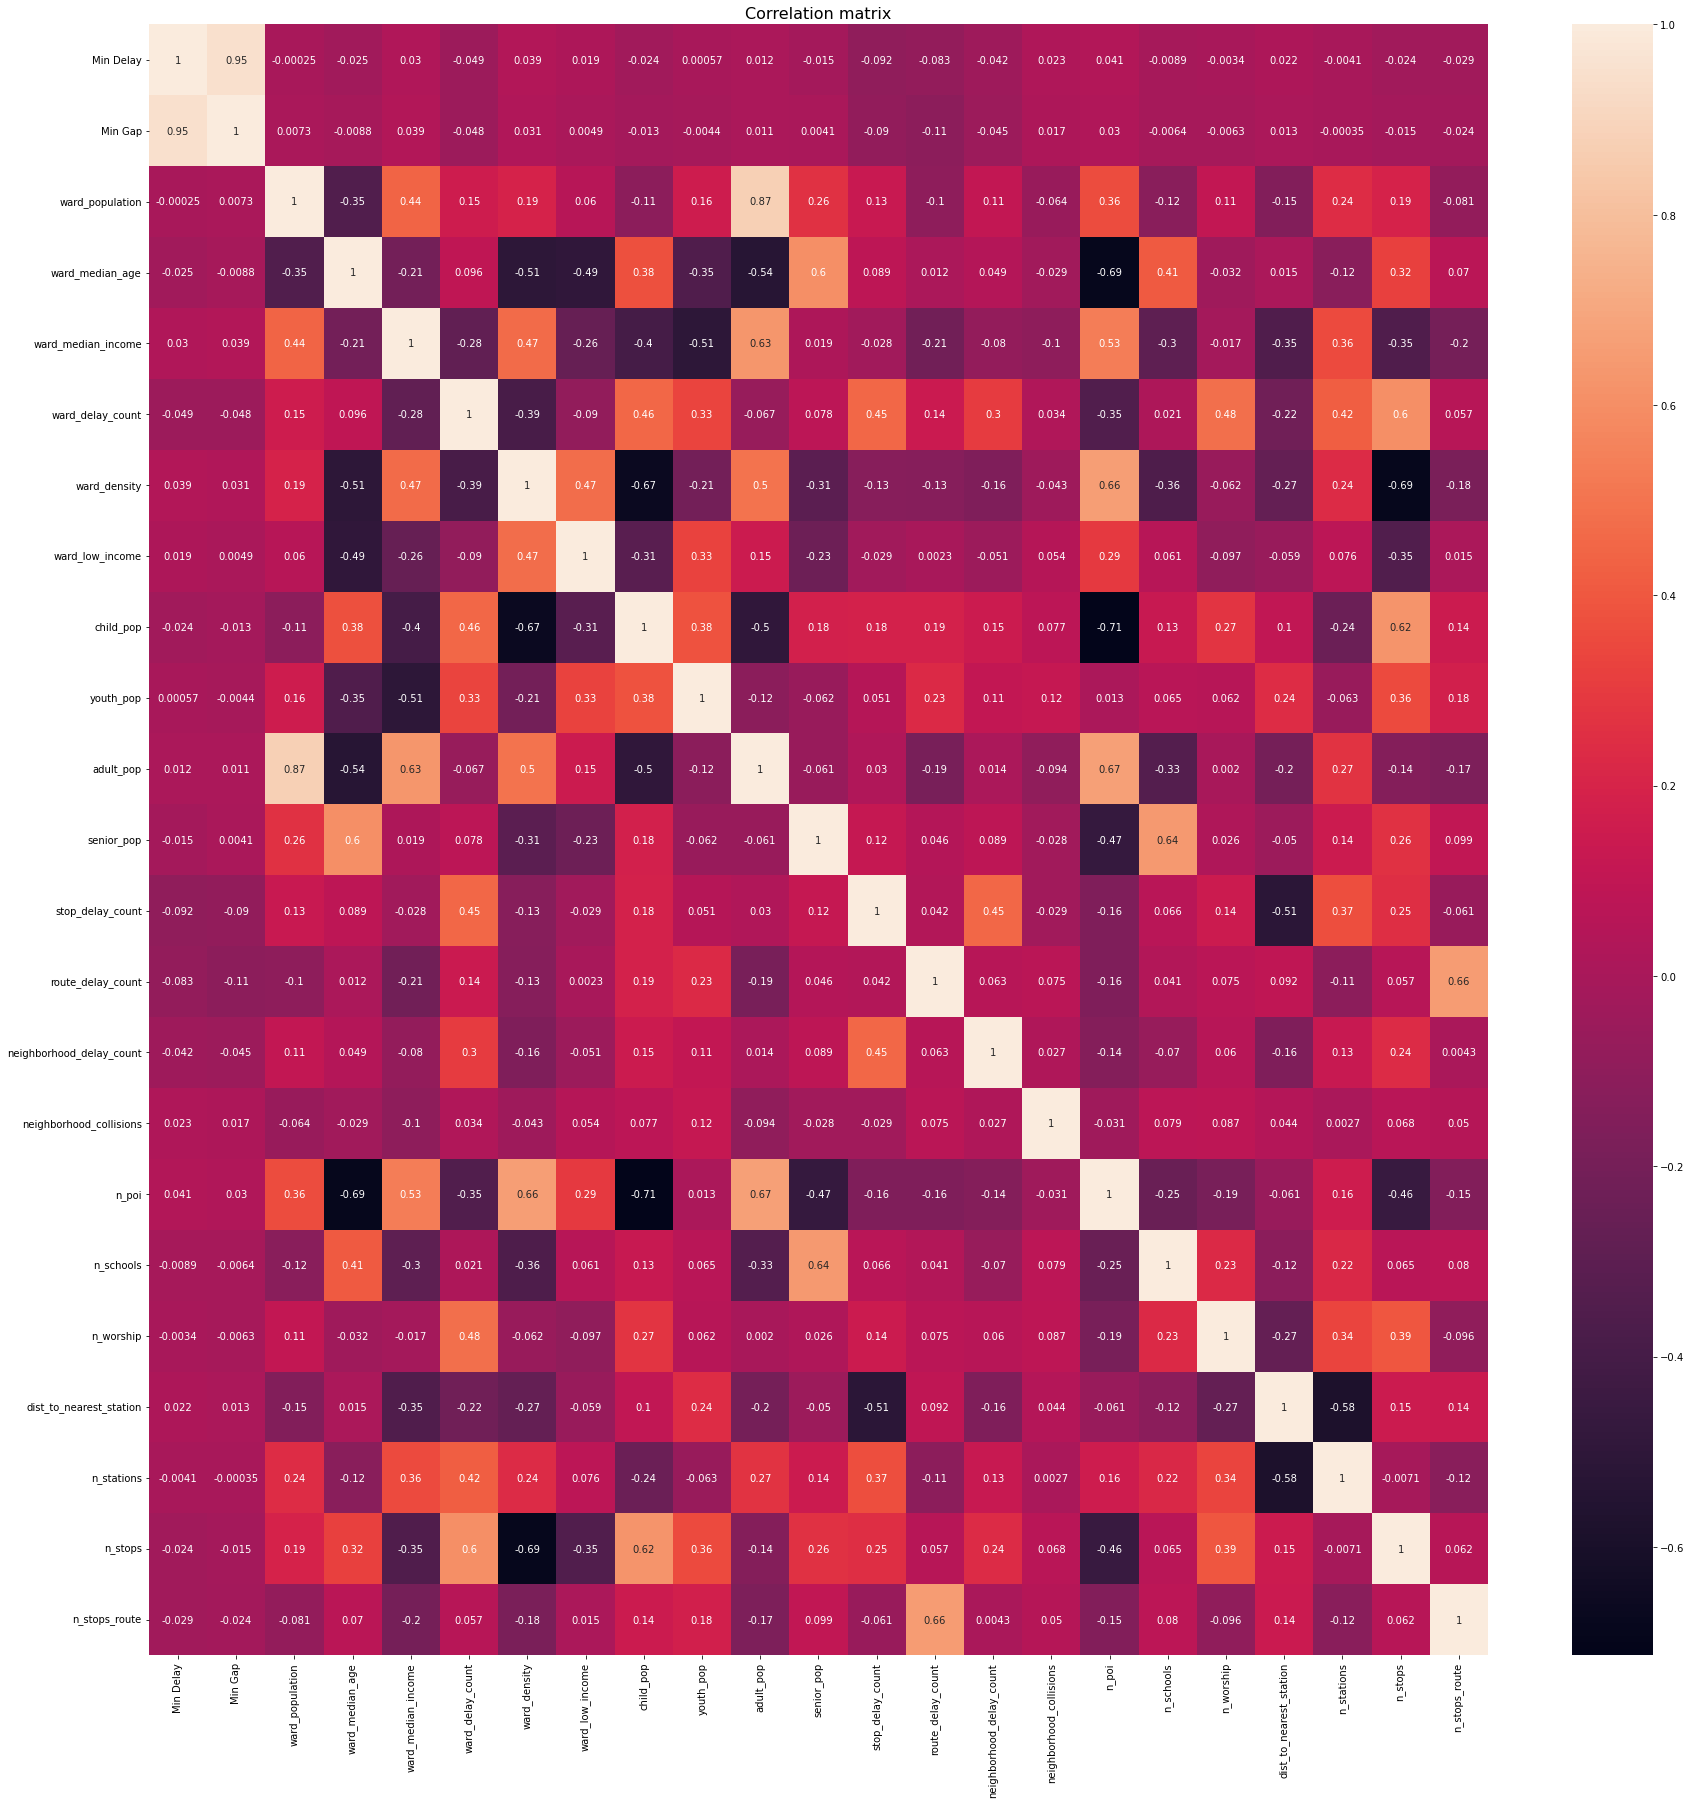

In [11]:
#displaying heat map
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(30,30))
# Creating the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
plt.title('Correlation matrix', fontsize=16)

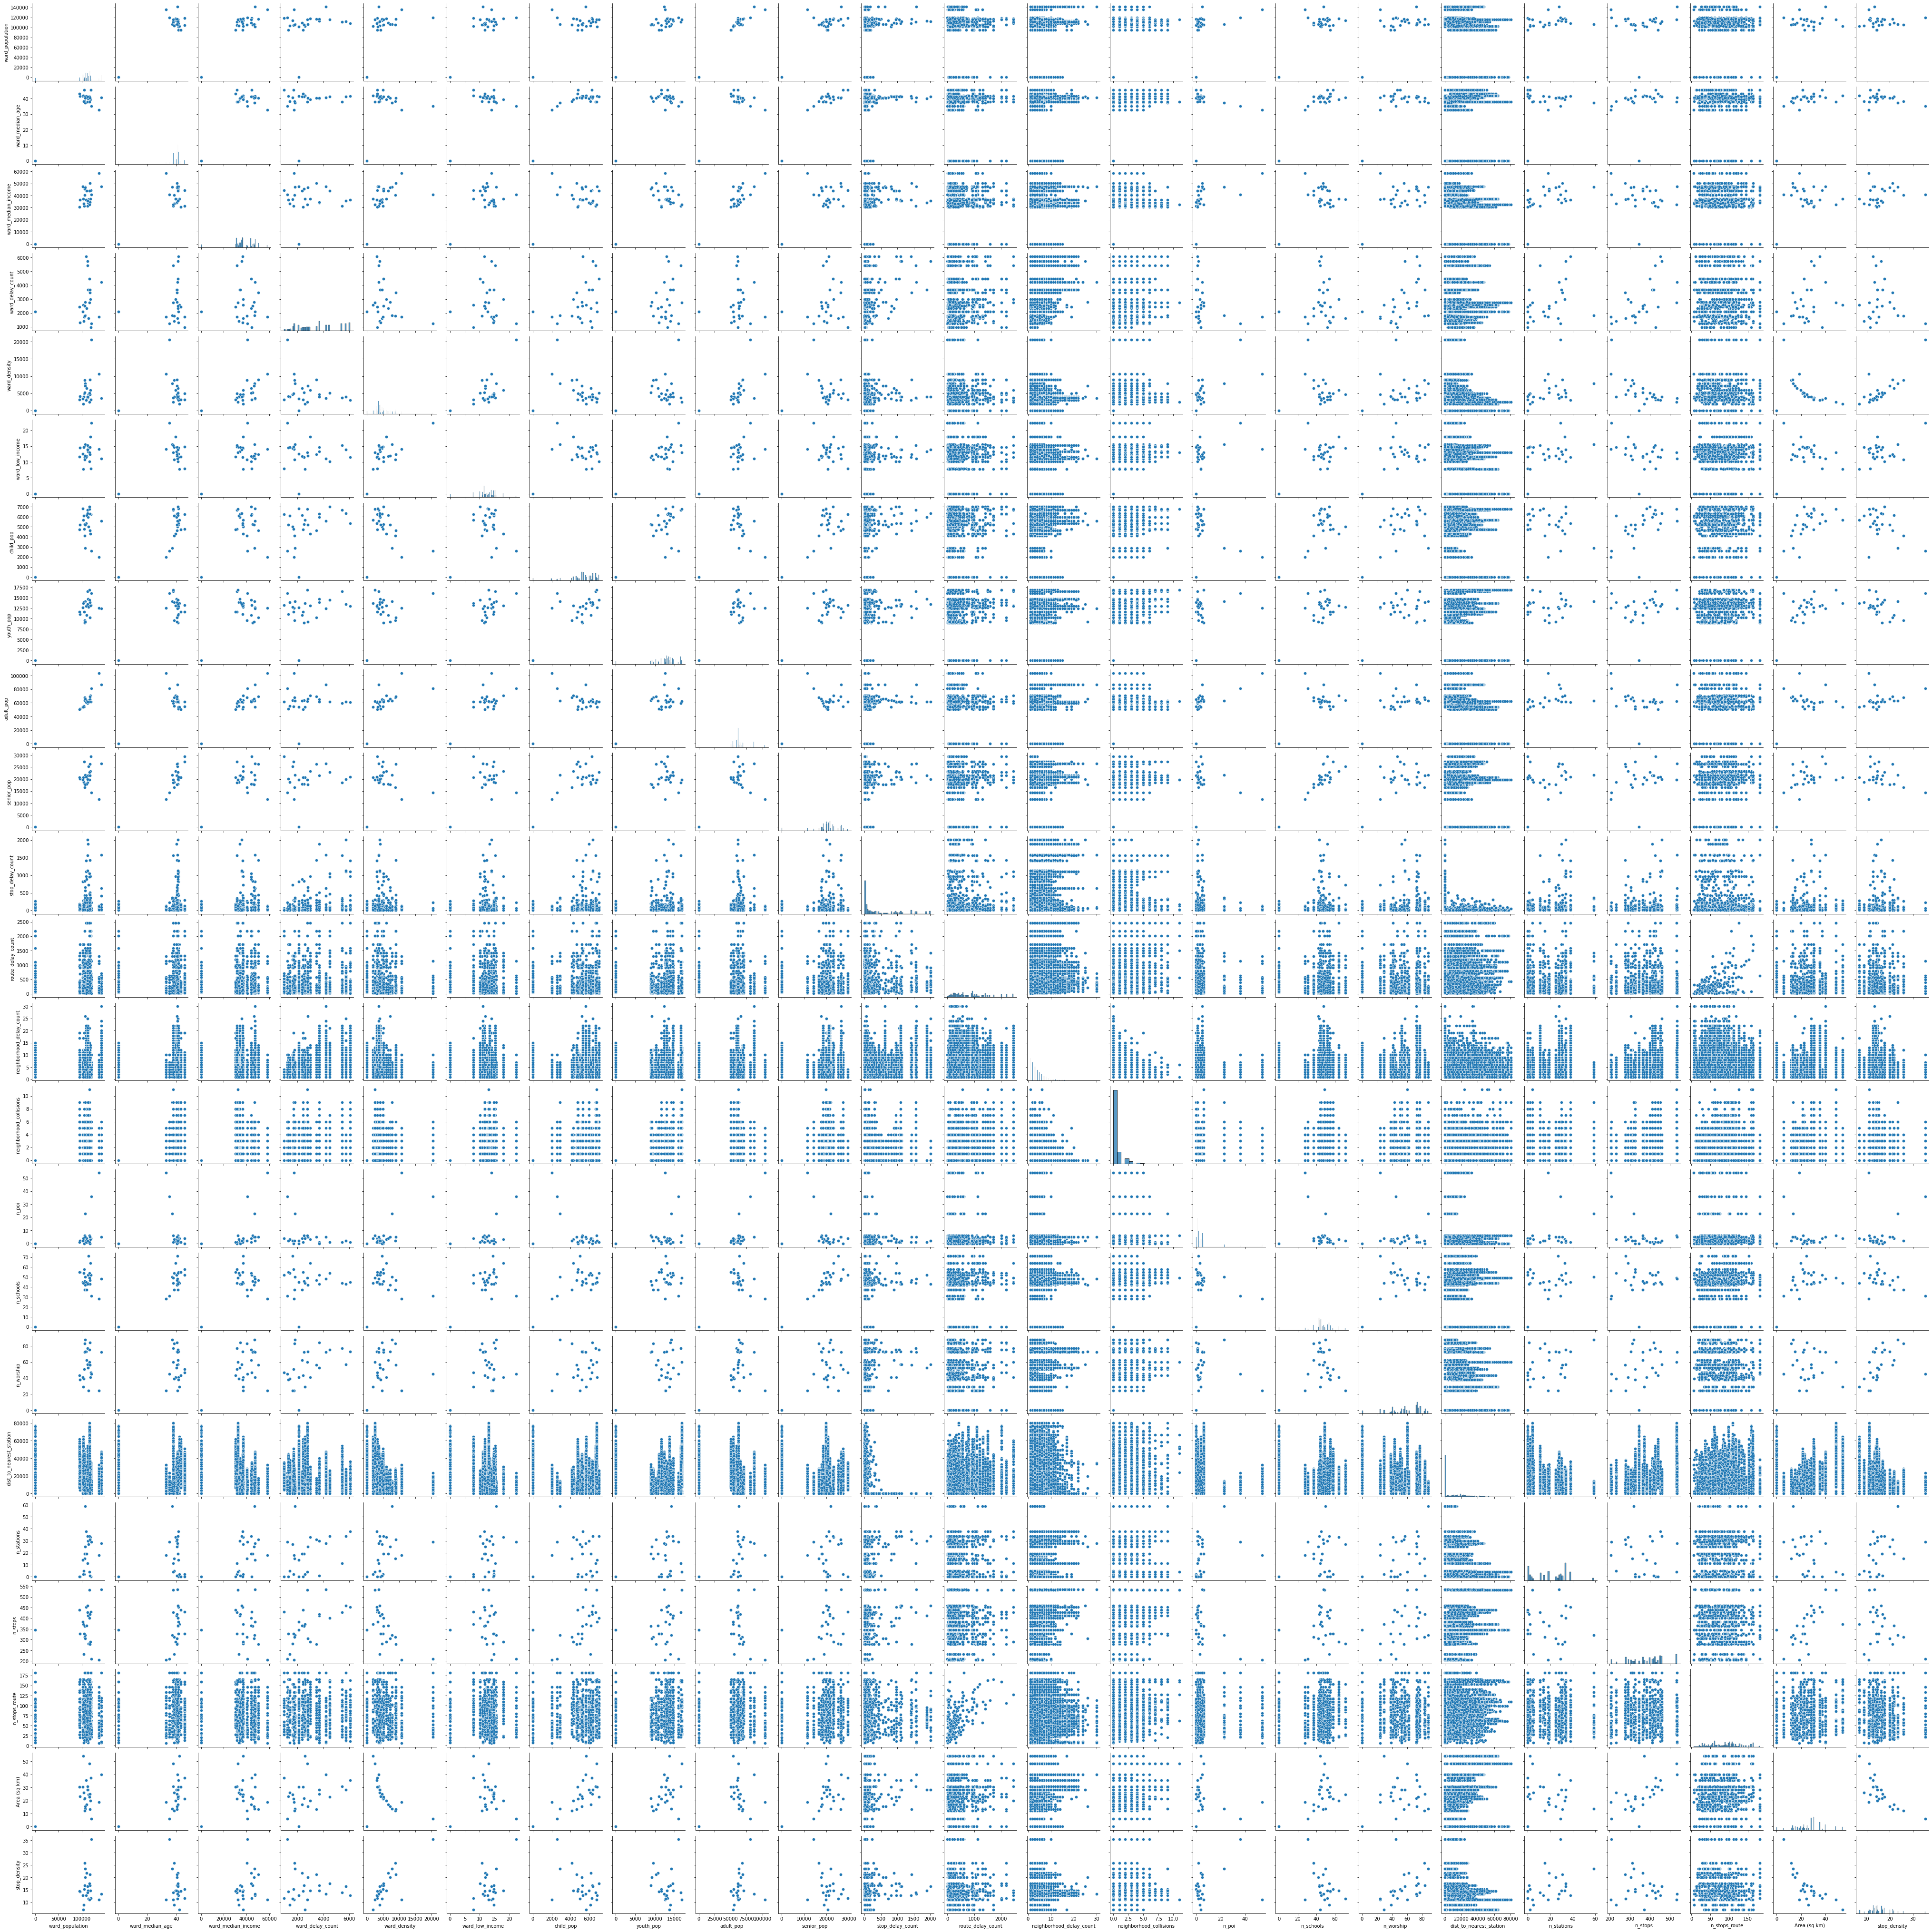

In [492]:
#creating pairplot
pair=sns.pairplot(sub)


#### it is evident that the number of children (0-14 years) in a ward affects the number of delays in a ward compared to any other factors

#### there is a negative correlation between number of points of interest and child_population, recalling the initial clusters, it would seem the wards with more points of interest are less likely to have  family homes

## 4 Exporting final dataset

In [ ]:
df2.to_pickle(os.path.join(path, '02 Data','Prepared', 'delays_final.pkl'))